In [ ]:
-+# Summary LDA topic modelling on Vallenato songs...
import csv
import spacy
import nltk
nltk.download('stopwords') # to ensure latest version...
from nltk.corpus import  stopwords
from nltk.tokenize import RegexpTokenizer
from preNLP import flat_DOCS
from preNLP import process_texts
import gensim.corpora as corpora
from gensim.models import CoherenceModel
#Visualization
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sjrp2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Loading database
URL =   "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrisc.csv"
documents = []
with open("lyrisc.csv", newline='', encoding='utf-8') as csvfile:
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:
    documents.append(row)

DOCS = process_texts(documents)
corpus = flat_DOCS(DOCS)

In [ ]:
custom_stop_words = set(["bis","te", "eres", "canto", "vas", "dire",  "llevar", "pedro", "adaluz", "tu", "andaluz", "estar",
                         "vamos", "quiza", "algun", "rafa", "iremo", "ir", "ay", "si", "pa", "gustavo", "rafael", "simon",
                         "consigo", "él", "dina", "luz", "marina",  "entonces", "hoy",
                         "dejo", "escalona", "jaime", "molina", "tobías", "carmen", "voy", "ahora", "hombe", "del",
                         "toa", "poncho", "va", "aquel", "mire", "dicen", "sigo", "adonde", "nadie", "nunca", "adios",
                         "eres", "oye", "puso", "poner", "estamos", "mande", "cuando", "enero", "febrero", "dijo",
                         "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "contarles",
                         "noviembre","diciembre", "año", "mes", "dia",  "alla", "aqui", "hacer", "maria", "tere", "rosalbita",
                         "lunes", "martes", "miercoles", "jueves", "viernes", "mas", "mañana", "ayer"])  # Add words you want to exclude
stop_words = set(stopwords.words('spanish')) | custom_stop_words  # Combine NLTK stopwords with custom stop words
# print(stop_words)  you can see the stop words!
DOCS

[['oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
nlp= spacy.load("es_core_news_lg")

In [ ]:
# Tokenization without stopwords and lemmas
corpus_tokens = []
for doc in corpus:
    print(doc)
    lemmas = []
    for token in tokenizer.tokenize(doc):
        if token not in stop_words:   #Avoid words that are in stop_words
            lemma = nlp(token)[0].lemma_  #find the base word
            if len(lemma.split(" "))<2 and lemma not in stop_words:   #Avoid a base with two words or more!
                lemmas.append(lemma)
    corpus_tokens.append(lemmas)
    print(lemmas)

oye morenita te vas a quedar muy sola porque anoche dijo el radio que abrieron el liceo como es estudiante ya se va escalona pero de recuerdo te dejo un paseo  bis   que te habla de aquel inmenso amor  que llevo  dentro del corazon  y dice todo lo que yo siento  que es pura pasion y sentimiento  cantando con el lenguaje grato que tiene la tierra  e pedro castro  bis   adios morenita me voy por la madrugada no quiero que me llores porque me da dolor  paso por valencia cojo la sabana  caracolicito y llego a fundacion  bis   y entonces me tengo que meter  en un diablo al que le llaman tren  ay  que sale por toa la zona pasa  y de tarde  se mete a santa marta   que sale por to a la zona pasa y de tarde se mete a santa marta  bis   ese orgullo que tu tienes no es muy bueno te juro que que mas tarde te vas a arrepentir  yo solo he querido dejarte un recuerdo porque en santa marta me puedo morir  y entonces  me tienes que llorar  y de ñapa te tienes que poner  traje negro  aunque no gustes de

In [ ]:
# Optional for k-means
#corpus_processed = [' '.join([word for word in doc]) for doc in corpus_tokens]

In [ ]:
# Using  corpus_tokens
# mapping each token to a unique integer number!
id2word = corpora.Dictionary(corpus_tokens)
# Optionally filter dictionary, e.g., remove words that appear in less than 2 documents
#id2word.filter_extremes(no_below=10, no_above=4)
#he dictionary can be further processed to remove infrequent or too common words.
#This step can help improve the quality of the topic model by removing noisy or uninformative terms.
print(id2word.token2id)

{'abrir': 0, 'amor': 1, 'anoche': 2, 'arrepentir': 3, 'aunque': 4, 'bueno': 5, 'cantar': 6, 'caracolicito': 7, 'castro': 8, 'coger': 9, 'corazon': 10, 'dar': 11, 'decir': 12, 'dentro': 13, 'diablo': 14, 'dolor': 15, 'estudiante': 16, 'fundacion': 17, 'grato': 18, 'gustser': 19, 'hablar': 20, 'hiciste': 21, 'inmenso': 22, 'jurar': 23, 'lenguaje': 24, 'liceo': 25, 'llamar': 26, 'llego': 27, 'llor': 28, 'llorar': 29, 'madrugada': 30, 'marta': 31, 'meter': 32, 'morenita': 33, 'morir': 34, 'negro': 35, 'orgullo': 36, 'pasar': 37, 'paseo': 38, 'pasion': 39, 'paso': 40, 'poder': 41, 'puro': 42, 'quedar': 43, 'querer': 44, 'querido': 45, 'radio': 46, 'recordar': 47, 'sabana': 48, 'salir': 49, 'santo': 50, 'sentimiento': 51, 'sentir': 52, 'solo': 53, 'sufrir': 54, 'tarde': 55, 'tierra': 56, 'to': 57, 'traje': 58, 'tren': 59, 'valencia': 60, 'zona': 61, 'ñapa': 62, 'aire': 63, 'alguno': 64, 'angelito': 65, 'aviador': 66, 'bien': 67, 'blanco': 68, 'camino': 69, 'casa': 70, 'cielo': 71, 'cimiento'

In [ ]:
corpus = [id2word.doc2bow(text) for text in  corpus_tokens]

Coherence Score: 0.3201271415947307


C:\Users\sjrp2\AppData\Local\Temp\ipykernel_18796\3025313223.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word[0] for word in topic[1]], rotation=45, ha='right')


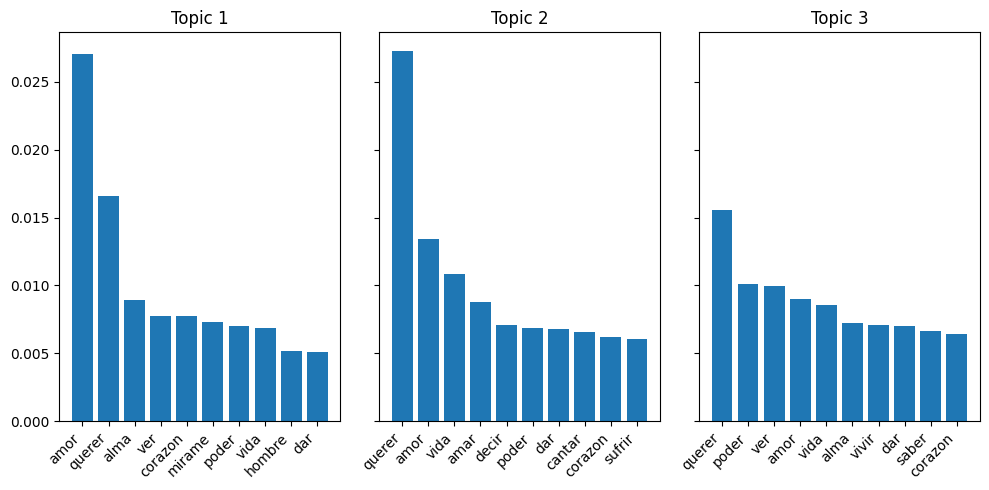

In [ ]:
num_topics= 3
lda_model = LdaModel(corpus,
                      num_topics=num_topics,
                     id2word=id2word,
                     passes=25,
                     random_state=123,
                     alpha='auto')


# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=corpus_tokens, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)


topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, num_topics, figsize=(10, 5), sharey=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    ax.bar([word[0] for word in topic[1]], [word[1] for word in topic[1]])
    ax.set_title(f'Topic {i+1}')
    ax.set_xticklabels([word[0] for word in topic[1]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pyLDAvis.display(vis)